## Интеллектуальный анализ данных – весна 2022
## Домашнее задание 4: kNN. Линейные модели. Работа с признаками

Правила:

* Домашнее задание оценивается в 10 баллов.

* Можно использовать без доказательства любые результаты, встречавшиеся на лекциях или семинарах по курсу, если получение этих результатов не является вопросом задания.

* Можно использовать любые свободные источники с *обязательным* указанием ссылки на них.

* Плагиат не допускается. При обнаружении случаев списывания, 0 за работу выставляется всем участникам нарушения, даже если можно установить, кто у кого списал.

* Старайтесь сделать код как можно более оптимальным. В частности, будет штрафоваться использование циклов в тех случаях, когда операцию можно совершить при помощи инструментов библиотек, о которых рассказывалось в курсе.  

### Задание 1:  Визуализация решающих поверхностей в kNN.

В этом задании мы изобразим решающую поверхность для классификатора kNN, чтобы наглядно увидеть, как классификатор принимает решения для новых объектов. Для простоты будем работать со встроенным в `sklearn` набором данных `wine`, содержащим информацию о характеристиках трёх видов вина. Описание набора можно найти [здесь](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_wine.html#sklearn.datasets.load_wine) и [здесь](https://rdrr.io/cran/rattle.data/man/wine.html). 

Загрузим набор данных и сохраним информацию о признаках в переменную `X`, а о зависимой переменной – в переменную `y`.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_wine

data = load_wine()
X = pd.DataFrame(data['data'], columns = data['feature_names'])
y = data['target']
X.head(8)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
5,14.20,1.76,2.45,15.2,112.0,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450.0
6,14.39,1.87,2.45,14.6,96.0,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290.0
7,14.06,2.15,2.61,17.6,121.0,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295.0


**Задача 1.1 (0.5 балла)** Есть ли в наборе данных пропущенные значения? Если да, то удалите их. Есть ли в наборе данных категориальные переменные? Если да, то закодируйте их при помощи OneHot-кодирования.

In [3]:
X.isna().sum()

alcohol                         0
malic_acid                      0
ash                             0
alcalinity_of_ash               0
magnesium                       0
total_phenols                   0
flavanoids                      0
nonflavanoid_phenols            0
proanthocyanins                 0
color_intensity                 0
hue                             0
od280/od315_of_diluted_wines    0
proline                         0
dtype: int64

**Задача 1.2 (0.5 балла)** Используя функцию `train_test_split()`, разделите выборку на тренировочную и тестовую, и долю тестовой выборки задайте равной 0.3. Так как разбиение осуществляется случайным образом, не забудьте зафиксировать `np.random.seed()` для воспроизводимости результатов.

In [4]:
from sklearn.model_selection import train_test_split
    
np.random.seed(0)
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3)

**Задача 1.3 (1 балл)** На тренировочной выборке обучите шесть классификаторов kNN, отличающихся только числом соседей. Для первого классификатора число соседей поставьте равным 1, для второго - 3, для третьего – 5, для четвертого – 10, для пятого – 15 и для шестого – 25 (обратите внимание на параметр `n_neighbours` класса `KNeighborsClassifier`). Для обучения используйте только два признака: `alcohol` и `magnesium` – и евклидово расстояние. Не забудьте масштабировать признаки, например, при помощи модуля `StandardScaler`.

Выведите долю правильных ответов на тренировочной и тестовой выборках для каждого классификатора.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

print('{:5} {:8} {:8}'.format('NN', 'Train', 'Test'))

X_train_norm = StandardScaler().fit_transform(X_train[['alcohol', 'magnesium']])
X_test_norm = StandardScaler().fit_transform(X_test[['alcohol', 'magnesium']])

classifiers = []

for k in [1, 3, 5, 10, 15, 25]:
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(X_train_norm, Y_train)
    classifiers.append(neigh)
    
    train_result = neigh.predict(X_train_norm)
    test_result = neigh.predict(X_test_norm)
    print('{:<5} {:<8} {:<8}'.format(k, 
                                  round(accuracy_score(train_result, Y_train), 2),
                                  round(accuracy_score(test_result, Y_test), 2)))

NN    Train    Test    
1     1.0      0.67    
3     0.81     0.72    
5     0.75     0.69    
10    0.73     0.7     
15    0.73     0.81    
25    0.67     0.81    


**Задача 1.4 (0 баллов)** Установите библиотеку `mlxtend` командой ниже. Библиотеку также можно установить из терминала при помощи `pip` или `conda`, как указано [здесь](http://rasbt.github.io/mlxtend/installation/). 

In [6]:
!pip install mlxtend

Если всё прошло успешно, то в выводе команды выше вы увидите сообщение вроде "successfully installed", а следующая ячейка выполнится без ошибок.

In [7]:
import mlxtend

**Задача 1.5 (1 балл)** Библиотека `mlxtend` позволяет достаточно просто визуализировать решающие поверхности обученных классификаторов. Изучите [документацию](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) библиотеки и найдите, как можно построить несколько графиков решающих поверхностей на сетке (decision regions grid). Постройте такую сетку графиков для обученных выше классификаторов.

**Подсказки:**
1. Вы можете использовать готовый код, приведённый в документации, и адаптировать его для нашего случая.
2. Вам могут понадобиться дополнительные библиотеки, которые используются в примере из документации.
3. Обратите внимание на то, как нужно изменить параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
4. В функции `plot_decision_region()` используйте `y_train` и нужные столбцы из `X_train`. Возможно, их придётся перевести в формат массива `numpy`.
5. Если в задаче 1.3 вы сохраните обученные классификаторы в список, то не будет необходимости обучать их заново. 
6. Построение графика может занять некоторое время – придётся немного подождать!

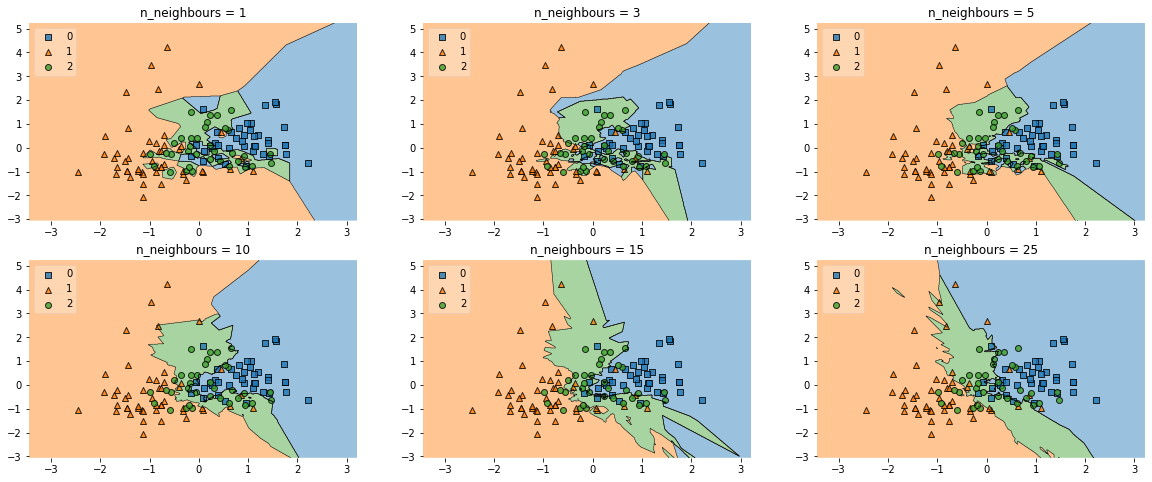

In [8]:
import matplotlib.gridspec as gridspec
from mlxtend.plotting import plot_decision_regions
import itertools

gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(20,8))

labels = ['n_neighbours = 1',
          'n_neighbours = 3',
          'n_neighbours = 5',
          'n_neighbours = 10',
          'n_neighbours = 15',
          'n_neighbours = 25']

for clf, lab, grd in zip(classifiers,
                         labels,
                         itertools.product([0, 1, 2], repeat=2)):
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X_train_norm, y=Y_train, clf=clf, legend=2)
    plt.title(lab)

plt.show()

**Задача 1.6 (0.5 балла)** Прокомментируйте результаты, полученные в задачах 1.3 и 1.5. Какое число соседей оптимально использовать для обучения классификатора? Поясните ваш выбор при помощи описания геометрии данных и получаемой решающей поверхности.

In [11]:
# В случае 1 и 3 соседей мы наблюдаем переобученность модели. 
# При числе соседей 15 и 25 мы видим, что значения подбираются очень обобщенно, 
# о чем свидетельствует большое количество выбросов.
# Лучие результаты демонстрируют модели с числом соседей 5 и 10. Рассматривая их можно заметить, 
# что лучше вего подстроилась модель с числом соседей равным 10.

### Задание 2: Обученная машина.

В этом задании мы рассмотрим упрощённую идею того, как метод ближайших соседей можно применить при моделировании движения робота. 

Рассмотрим робота на дискретной двумерной плоскости, который за каждый момент дискретного времени может передвинуться на одну позицию вправо, влево, вверх или вниз. На плоскости разбросаны метки одного из четырёх классов, анализируя которые робот может (но не обязан) корректировать своё перемещение. Пусть метки класса 0 соответствуют сигналу переместиться вправо, метки класса 1 – влево, класса 2 – вверх, класса 3 – вниз. 

Передвижение робота осуществляется по следующему правилу: с вероятностью 0.2 робот передвинется вправо, и с вероятностью 0.8 – оценит, метки какого класса преобладают среди `k` его ближайших соседей, и передвинется в направлении этого доминирующего класса. 

Для лучшего понимания происходящего изобразим возможное положение робота и меток:

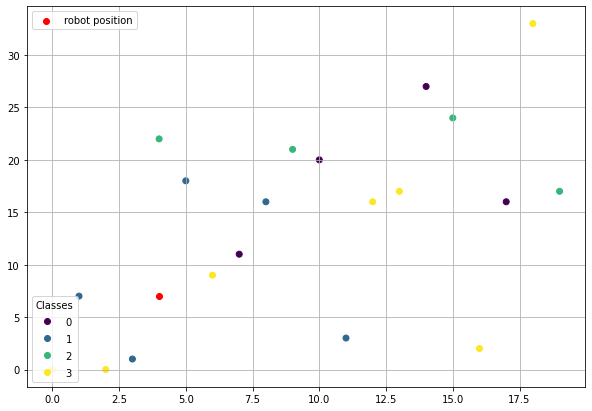

In [12]:
np.random.seed(12345)
x = np.arange(20)
landmarks = x + np.round(np.random.normal(2, 8, 20)) # сгенерируем случайные метки
random_classes = np.random.randint(0, 4, 20)

fig, ax = plt.subplots(figsize = (10, 7))
scatter = ax.scatter(x, landmarks, c = random_classes)
ax.scatter(4, 7, c = 'r', marker = 'o', label = 'robot position')
legend1 = ax.legend(*scatter.legend_elements(),
                    loc = "lower left", title = "Classes")
ax.add_artist(legend1)

plt.plot()
_ = plt.legend()
_ = plt.grid()

На следующем шаге робот передвинется на 1 либо вправо, либо в направлении, которое указывают ближайшие соседи.

**Задача 2.1 (1.5 балла)** Реализуйте класс, который задаёт описанное поведение робота, используя шаблон ниже:
1. Определите атрибуты `trajectory` (переменная для хранения истории перемещения робота в виде последовательности точек с двумя координатами) и `knn` (обученный kNN классификатор, который по позиции метки предсказывает её класс).
2. Определите метод `move()`: рассчитайте новое положение робота по правилам выше и добавьте её в историю перемещений. Подсказка: исходы можно интерпретировать как результаты подбрасывания монетки с вероятностью орла, равной 0.2. Для моделирования такого подбрасывания можно использовать, например, `np.random.binomial()` с правильными параметрами. 

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [15]:
class MobileRobot():
    
    def __init__(self, k, initial_position, landmarks, classes):
        '''
        Attributes:
        ------
        k: int
            Number of neighbours
            
        initial_position: ndarray
            Initial position of the robot as a point, e.g. (-1, 1)
            
        landmarks: ndarray
            numpy array of shape (n_landmarks, 2) with the euclidean positions of points
        
        classes: ndarray
            numpy array of shape (n_landmarks, ) with class of landmark for each point in landmarks
        
        '''
        # Store the history of movements
        self.trajectory = np.array([initial_position])
        
        # kNN Classifier for determining the classes of landmarks
        self.knn = KNeighborsClassifier(n_neighbors=k)
        self.knn.fit(landmarks, classes)
        
        # Mapping between classes of points and movements
        self.mapping = {0: np.array([1, 0]), 
                        1: np.array([-1, 0]),
                        2: np.array([0, 1]),
                        3: np.array([0, -1])}
        
        
    def move(self):
        '''
        Calculate new position of the robot and add it to the history
        '''
        if np.random.binomial(1, 0.2):
            self.trajectory = np.vstack([self.trajectory, self.trajectory[-1] + self.mapping[0]])
            return
        current_pos = self.trajectory[-1]
        pos_type = self.knn.predict([current_pos])
        self.trajectory = np.vstack([self.trajectory, current_pos + self.mapping[pos_type[0]]])

**Задача 2.2 (0.5 балла)** Дополните функцию `conduct_experiment`: определите переменную `traj` так, чтобы она содержала историю перемещения робота в виде двумерного массива numpy, в котором столбцы соответствуют координатам x и y соответствующей позиции.

In [19]:
def conduct_experiment(x,
                       mean = 0,
                       std = 2, 
                       n_movements = 10, 
                       k = 3, 
                       initial_position = np.array([10, 20])):
    
    np.random.seed(12345)
    # Generate random landmarks
    landmarks = np.vstack((x, x + np.round(np.random.normal(mean, std, len(x))))).T
    
    # Generate random classes of landmarks
    classes = np.random.randint(0, 4, size = len(x))
    
    # Conduct experiment
    robot = MobileRobot(k, initial_position, landmarks, classes)
    
    for n in range(n_movements):
        robot.move()
    
    fig, ax = plt.subplots(figsize = (10, 8))
    scatter = ax.scatter(landmarks[:, 0], landmarks[:, 1], c = classes)
    legend1 = ax.legend(*scatter.legend_elements(),
                        loc="lower left", title="classes")
    ax.add_artist(legend1)
    
    traj = robot.trajectory
    ax.plot(traj[:, 0], traj[:, 1], 
               c = 'r', marker = 'o', label = 'robot position')

    plt.plot()
    _ = plt.legend()
    _ = plt.grid()

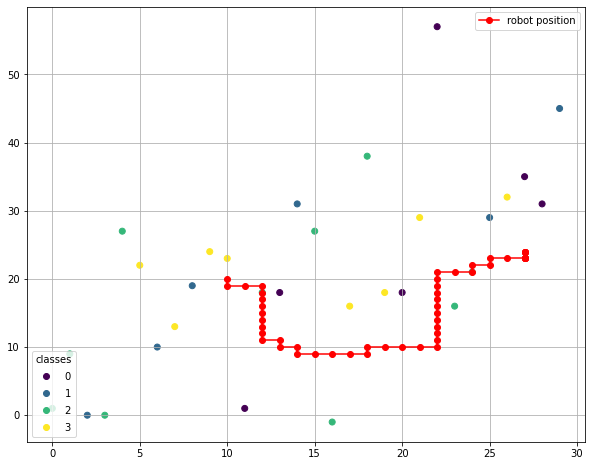

In [20]:
x = np.arange(30)
conduct_experiment(x, mean = 3, std = 10, k = 5, n_movements = 50)

**Задача 2.3 (1 балл)** Как число соседей влияет на траекторию движения робота в нашем эксперименте? Постройте четыре графика с различным числом соседей на ваш выбор. А что было бы в случае, если классы назначаются меткам не случайно, а осмысленно? 

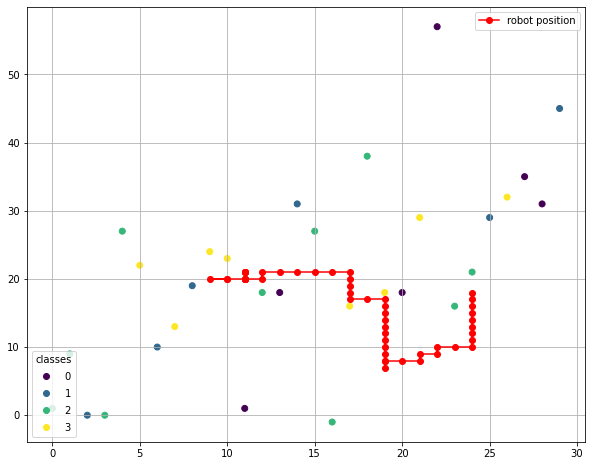

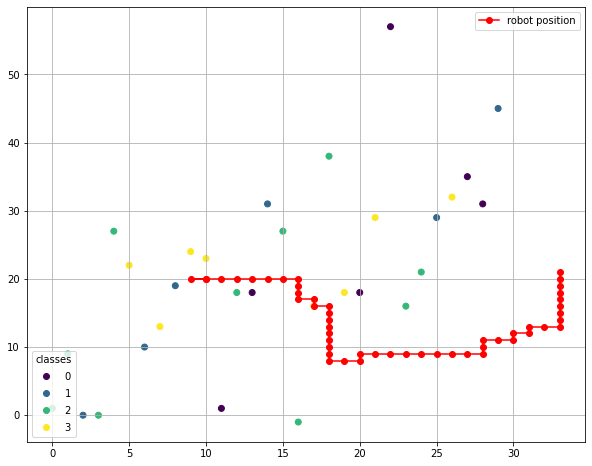

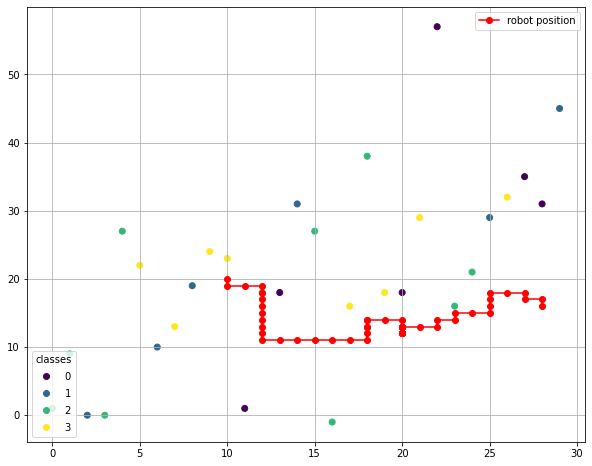

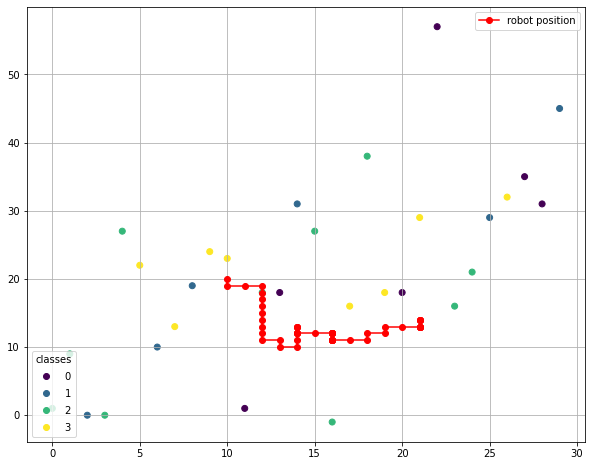

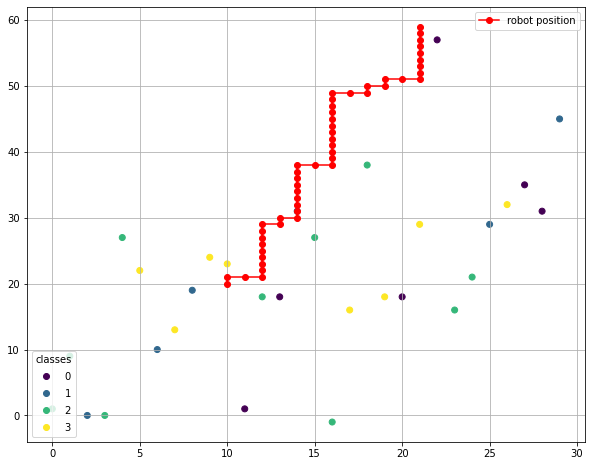

In [21]:
conduct_experiment(x, mean = 3, std = 10, k = 1, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 3, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 10, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 15, n_movements = 50)
conduct_experiment(x, mean = 3, std = 10, k = 30, n_movements = 50)

# При большом числе соседий робот чаще сохраняет выбранное направление, ибо результирующее 
# движение усредняется в большом радиусе от текущего положения. Среднее редко и не на много
# изменяется при движении.
# При маленьких значениях также наблюдается сохранение направления когда вблизи движения
# имеется лишь одна точка. При смещении эта одна точка остается ближейшей. Направление будет 
# сохраняться пока это точка не перестанет быть ближайшей. Это логично.

# Если бы мы задавали точки осмысленно, то можно было бы направлять робота в ту сторону, 
# куда предполагает текущая задача. Движение могло бы быть более структурированно и не выглядело бы хаотичным.

### Задание 3: Линейная регрессия.

В этом задании мы рассмотрим различные аспекты построения линейной модели. Мы будем работать с одним из классических наборов данных в статистике, содержащим информацию о бриллиантах. Описание можно посмотреть [здесь](https://www.kaggle.com/shivam2503/diamonds).

In [57]:
data = pd.read_csv('data/diamonds.csv')
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


Мы будем решать задачу предсказания цены бриллианта `price` в зависимости от его характеристик.

**Задача 3.1 (0.1 балла)** Есть ли в наборе данных пропущенные значения? Если да, удалите их. 

In [58]:
data.isna().sum()

Unnamed: 0    0
carat         0
cut           0
color         0
clarity       0
depth         0
table         0
price         0
x             0
y             0
z             0
dtype: int64

**Задача 3.2 (0.1 балла)** Есть ли в наборе данных бессмысленные столбцы (признаки, не несущие дополнительной информации)? Если да, то удалите их.

In [59]:
df = data.iloc[: , 1:]
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


**Задача 3.3 (0.1 балла)** Линейная регрессия основана на предположении о линейной связи между признаками и целевой переменной, а потому перед выбором переменных для включения в модель имеет смысл проверить, насколько эта связь выполняется. Для следующих пунктов нам также потребуются выборочные корреляции между признаками. Выведите матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной (то есть в этой матрице будет $k+1$ строка, где $k$ – количество вещественных признаков).

Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [60]:
df.corr()

# Признаки carat, x, y, z коррелируют лучше всего.

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


**Задача 3.4 (0.1 балла)** Так как линейная модель складывает значения признаков с некоторыми весами, нам нужно аккуратно обработать категориальные признаки. Закодируйте категориальные переменные при помощи OneHot-кодирования.

In [61]:
df.dtypes
df = pd.get_dummies(df, drop_first=True)
df

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


**Задача 3.5 (0.2 балла)** Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [66]:
y = df['price']
X = df.drop('price', axis=1)
np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
X_train_copy = X_train

X.columns


Index(['carat', 'depth', 'table', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal',
       'cut_Premium', 'cut_Very Good', 'color_E', 'color_F', 'color_G',
       'color_H', 'color_I', 'color_J', 'clarity_IF', 'clarity_SI1',
       'clarity_SI2', 'clarity_VS1', 'clarity_VS2', 'clarity_VVS1',
       'clarity_VVS2'],
      dtype='object')

**Задача 3.6 (0.3 балла)** Зачастую при использовании линейных моделей вещественные признаки масштабируются. При этом оценки коэффициентов теряют прямую статистическую интерпретацию ("при увеличении $X_1$ на 1, $y$ увеличивается на $w_1$"), но приобретают свойства, полезные в задачах машинного обучения. В этой задаче масштабируйте вещественные признаки тренировочной и тестовой выборок при помощи модуля `StandardScaler`.

In [67]:
scaler = StandardScaler()
scaled = scaler.fit_transform(X_train[['carat', 'depth', 'table', 'x', 'y', 'z']])
X_train = np.concatenate((scaled, 
                          X_train.drop(['carat', 'depth', 'table', 'x', 'y', 'z'], axis=1).to_numpy()),
                         axis=1)
scaled = scaler.fit_transform(X_test[['carat', 'depth', 'table', 'x', 'y', 'z']])
X_test = np.concatenate((scaled,
                         X_test.drop(['carat', 'depth', 'table', 'x', 'y', 'z'], axis=1).to_numpy()),
                        axis=1)


**Задача 3.7 (0.2 балла)** Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [71]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
reg = LinearRegression().fit(X_train, y_train)

pred = reg.predict(X_test)
print(mean_squared_error(reg.predict(X_train), y_train), mean_squared_error(pred, y_test))

1284661.8621191257 1258940.8504935654


**Задача 3.8 (0.2 балла)** Изучите документацию модуля `LinearRegression` и выведите полученные оценки коэффициентов. Назовите вещественные переменные, оценки коэффициентов которых по модулю на порядок превышают оценки прочих вещественных переменных.

In [85]:
arr = np.concatenate(([reg.coef_], [np.array(X.columns)]), axis=0)

for i in range(len(arr[0])):
    print(f"{arr[1][i]} = {arr[0][i]}")
# carat, x

carat = 5278.119983938957
depth = -94.26693610935035
table = -65.61837226838115
x = -1050.0247597557195
y = -2.6473797066358884
z = -40.56862298890053
cut_Good = 541.6398685229308
cut_Ideal = 795.7868168651903
cut_Premium = 721.7975349311289
cut_Very Good = 698.4331729582038
color_E = -180.61797246399948
color_F = -236.92469425225784
color_G = -450.5585333426644
color_H = -943.6180436874404
color_I = -1428.8083325411676
color_J = -2343.3751505897444
clarity_IF = 5333.555068877393
clarity_SI1 = 3670.378092333711
clarity_SI2 = 2701.8680983934382
clarity_VS1 = 4592.448266754511
clarity_VS2 = 4272.557380908764
clarity_VVS1 = 5021.558582804125
clarity_VVS2 = 4954.598502437011


**Задача 3.9 (0.4 балла)** Как можно заметить из анализа корреляционной матрицы в задаче 3.3, между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы *мультиколлинеарности*. Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. Как известно, для решения этой проблемы можно либо исключить некоторые признаки из модели, либо использовать регуляризацию. Мы воспользуемся вторым вариантом. 

Вспомним, что смысл регуляризации заключается в том, чтобы изменить функцию потерь так, чтобы устранить проблемы, появляющиеся из-за мультиколлинеарности. При L1-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

Такая модель называется Lasso-регрессией.

При L2-регуляризации предлагается минимизировать следующую функцию потерь:

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

Такая модель называется Ridge-регрессией. 

Обучите Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10. Для этого используйте модули `Lasso` и `Ridge` из `sklearn`. Сильно ли уменьшились веса? Сделайте вывод о том, насколько сильно проблема мультиколлинеарности проявлялась в изначальной регрессии.

In [88]:
reg_lasso = Lasso(alpha=10)
reg_ridge = Ridge(alpha=10)
reg_lasso.fit(X_train, y_train)
reg_ridge.fit(X_train, y_train)


arr = np.concatenate(([reg_lasso.coef_], [reg_ridge.coef_], [np.array(X.columns)]), axis=0)

for i in range(len(arr[0])):
    print(f"{arr[2][i]}: Lass = {arr[0][i]}, Ridge = {arr[1][i]}")

    
# Веса уменьшились не очень сильно, то есть не на порядок, это значит 
# что проблема мультиколлинеарности проявлялась не сильно

carat: Lass = 4717.430499070522, Ridge = 5228.441289526143
depth: Lass = -153.89762985715777, Ridge = -97.24416055325092
table: Lass = -114.3594977693797, Ridge = -68.54792964104975
x: Lass = -634.6659612460677, Ridge = -1012.7671324579372
y: Lass = -0.0, Ridge = -1.7180061063703875
z: Lass = -23.863759406197083, Ridge = -41.69128993225456
cut_Good: Lass = -0.0, Ridge = 564.9722499880281
cut_Ideal: Lass = 157.77331087712682, Ridge = 823.3080889093305
cut_Premium: Lass = 64.96421212358928, Ridge = 746.1471540662374
cut_Very Good: Lass = 82.91236049399078, Ridge = 727.7225461215003
color_E: Lass = 2.8924510873099165, Ridge = -168.55782761239962
color_F: Lass = 0.0, Ridge = -223.7026211046253
color_G: Lass = -111.41756574016622, Ridge = -433.1824403134281
color_H: Lass = -594.7973731877522, Ridge = -926.8781788919633
color_I: Lass = -989.2379477534528, Ridge = -1404.3491505308657
color_J: Lass = -1785.7909553995369, Ridge = -2308.4349444766094
clarity_IF: Lass = 1366.347374317616, Ridge =

**Задача 3.10 (0.4 балла)** Как обсуждалось на семинарах, Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции $\alpha$: 0.1, 1, 10, 100, 200 –  обучите Lasso- и Ridge-регрессии и постройте график измненения евклидовой нормы весов (`np.linalg.norm()` от вектора оценок коэффициентов) в зависимости от параметра $\alpha$. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов. 

Какой метод агрессивнее уменьшает веса? Поясните, почему Lasso-регрессию часто используют для отбора признаков.

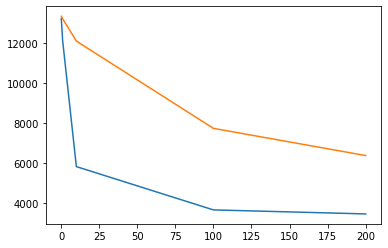

In [93]:
lasso_y = []
ridge_y = []

x = [0.1, 1, 10, 100, 200]

for a in x:
    reg_l = Lasso(alpha=a).fit(X_train, y_train)
    reg_r = Ridge(alpha=a).fit(X_train, y_train)
    
    lasso_y.append(np.linalg.norm(reg_l.coef_))
    ridge_y.append(np.linalg.norm(reg_r.coef_))
    
plt.plot(x, lasso_y)
plt.plot(x, ridge_y)

plt.show()

# Lasso агрессивнее уменьшает веса, что явно видно по графику. 
# Lasoo так же обладает полезным свойством - занулять некоторые коэффициенты, это помогает прпи отборе признаков

**Задача 3.11 (0.5 балла)** 
В зависимости от значения параметра $\alpha$ в Lasso-регрессии зануляются разные оценки коэффициентов. Оптимальное значение $\alpha$ можно подобрать, например, при помощи кросс-валидации по тренировочной выборке. 

Для проведения кросс-валидации можно использовать модуль `LassoCV`. Этот модуль принимает список значений $\alpha$ (параметр `alphas`) и при обучении проводит кросс-валидацию для каждого значения из этого списка, сохраняя MSE на каждом участке кросс-валидации (количество участков – параметр `cv`) в матрицу ошибок (то есть итоговая матрица будет иметь размер `len(alphas)` $\times$ `cv`). После обучения модели матрицу ошибок можно получить, обратившись к атрибуту `.mse_path_`. 

Заметим, что модель может использовать $\alpha$ не в том порядке, в котором вы подаёте их в функцию: для определения порядка используйте атрибут `.alphas_` Установите количество участков для кросс-валидации (параметр `cv`) равным 5.

Усредните ошибки для каждого значения $\alpha$ (то есть по строкам матрицы ошибок) и выберите то значение, которое даёт наибольшее качество. 

In [91]:
from sklearn.linear_model import LassoCV

reg = LassoCV(alphas=x, cv=5, random_state=0).fit(X_train, y_train)

means = []

for (i, val) in enumerate(reg.alphas_):
    means.append(reg.mse_path_[i].mean())
    
min_index = np.argmin(np.array(means))
print("a = {} with the value = {}".format(reg.alphas_[min_index], means[min_index]))
    


a = 1.0 with the value = 1292173.0783212031


/home/genuis/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:526: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1177271855.8237152, tolerance: 48309472.87280813
  model = cd_fast.enet_coordinate_descent_gram(


**Задача 3.12 (0.5 балла)** Обучите итоговую Lasso-регрессию с выбранным параметром $\alpha$ на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [97]:
regr = Lasso(alpha=1).fit(X_train, y_train)
regr.coef_

arr_regr_lasso = np.concatenate(([regr.coef_], [np.array(X.columns)]), axis=0)

for i in range(len(arr_regr_lasso[0])):
    print(f"{arr_regr_lasso[1][i]} = {arr_regr_lasso[0][i]}")

# Признак y занулился, что свидетельствует о его бесполезности. 
# В то же время Carat является самым информативным параметром

carat = 5219.223470039681
depth = -103.13762135298839
table = -72.11474229522307
x = -1009.839687653765
y = -0.0
z = -38.51315893427336
cut_Good = 437.82050935237237
cut_Ideal = 694.9102722215418
cut_Premium = 619.8842751248005
cut_Very Good = 601.6004718446187
color_E = -127.1540969212337
color_F = -183.44785076828776
color_G = -392.8279934931736
color_H = -885.219209172728
color_I = -1360.4395504728222
color_J = -2263.203068900582
clarity_IF = 4792.951485229574
clarity_SI1 = 3171.1391003520607
clarity_SI2 = 2206.816200695625
clarity_VS1 = 4082.0771995429363
clarity_VS2 = 3770.0733029947423
clarity_VVS1 = 4500.32277912932
clarity_VVS2 = 4440.810599187434


**Задача 3.13 (0.4 балла)** Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии из задачи 3.7. Какую модель лучше использовать для предсказаний? Приведите возможное объяснение, почему одна модель оказалась лучше другой.

In [109]:
reg_lasso_best = Lasso(alpha=1).fit(X_train, y_train)
prediction = reg_lasso_best.predict(X_test)


print(mean_squared_error(prediction, y_test), mean_squared_error(pred, y_test))

# В моем решении  вышло, что линейная реграссия без методов регуляризации получилась точнее, возможно, 
# это произошло из-за зануления параметра y, который влиял на цену алмаза.

1265898.7461823493 1258940.8504935654
